*Import the necessary libraries:*

In [4]:
import pandas as pd
import re
import demoji
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [5]:
# Load and preprocess the tweet data
data = pd.read_csv("/content/dataskripsi.csv")


In [6]:
data.head()

,Unnamed: 0,date,tweet,username
0,0,2023-02-28 23:59:23+00:00,"as we move into 2023, the global economy isn‘t...",BigMovesRZ
1,1,2023-02-28 23:58:59+00:00,This is a chat gpt response.,ibrahiym
2,2,2023-02-28 23:58:51+00:00,"If we are living in a simulated world, we may ...",wliu2011
3,3,2023-02-28 23:58:47+00:00,I was showing someone at work how Chat GPT wor...,FatherOfKane
4,4,2023-02-28 23:58:12+00:00,Can chatGPT do taxes? Asking for a friend,MissToriMadison


In [7]:
#check columns
data.columns

Index(['Unnamed: 0', 'date', 'tweet', 'username'], dtype='object')

In [8]:
# check data type
data.dtypes

Unnamed: 0     int64
date          object
tweet         object
username      object
dtype: object

In [9]:
# check source
data['username'].unique()

array(['BigMovesRZ', 'ibrahiym', 'wliu2011', 'FatherOfKane',
       'MissToriMadison', 'SciFiClimateGuy', 'Grail_Whale', 'jbtruth1',
       'michaelforce', 'optionwavtrader', 'broluoch', 'ryoga316',
       'juanmoray', 'unsuckEBAY', 'KyleRummens', 'moniquemath',
       'antheezyone', 'Nick_Beaton', 'unstuffedsamosa', 'johnsonbrightt',
       'david_actually', 'Pork___', 'MajesticACTUAL', 'Tyrone_Uzzell',
       'alstonhuang', 'bellamunozr', 'BlueBoxTraveler', 'sickoseysill',
       'CausalSandeep', 'CardinalCathboy', 'DesertCarmen',
       'OffCopyrightIP', 'ExtensionDean', 'Mikey_NFTs', 'Beingwokesajoke',
       'Voice_of_Ed', 'TXLonestarWolf', '_GingerShandy', 'iRocKeT1391',
       'SamAlfafaraRuiz', 'iamJayrad', 'lydiughhh', 'hackthistweet',
       'tarafitness27', 'M4573RCH', 'dohreimi', 'ahf77118198',
       'lilifoskett', 'brunolarvol', 'JustinBleuel', 'THE_Eric_Allen',
       'kareem_carr', 'Terse_tech', 'StephenLCasper', 'JokesAstro',
       'GardeRpublicai4', 'rachdele', 'Happ

In [10]:
#username
data['username'].value_counts()

_Mike_Simmons      11
AsiulIceAgojie      9
jj_devbot_          3
Beingwokesajoke     3
Grail_Whale         3
                   ..
Barta57             1
jaydawaydussy       1
duncanwilcox        1
speckproducts       1
CizreK              1
Name: username, Length: 948, dtype: int64

In [11]:
#plot the top value_counts
data['username'].value_counts().nlargest(30)

_Mike_Simmons      11
AsiulIceAgojie      9
jj_devbot_          3
Beingwokesajoke     3
Grail_Whale         3
pataguccibanker     3
sickoseysill        2
perseu_voyager      2
RobertStover        2
Anisme123           2
sarajchurchill      2
ChatGPTMagician     2
baphotex            2
startupily          2
PrompterGPT         2
yukitaylor00        2
alsaai_eth          2
Mikey_NFTs          2
ElectrikTwo         2
stc_rochester       2
LegitEquityD        2
aitoolstoday        2
LalindraTweets      2
EricSDougherty      2
amardeep01389       2
RHYDIZEL            2
AndreaMDarcy        2
2020WriteIn         2
DarrellLerner       2
amsterdamnedx       2
Name: username, dtype: int64

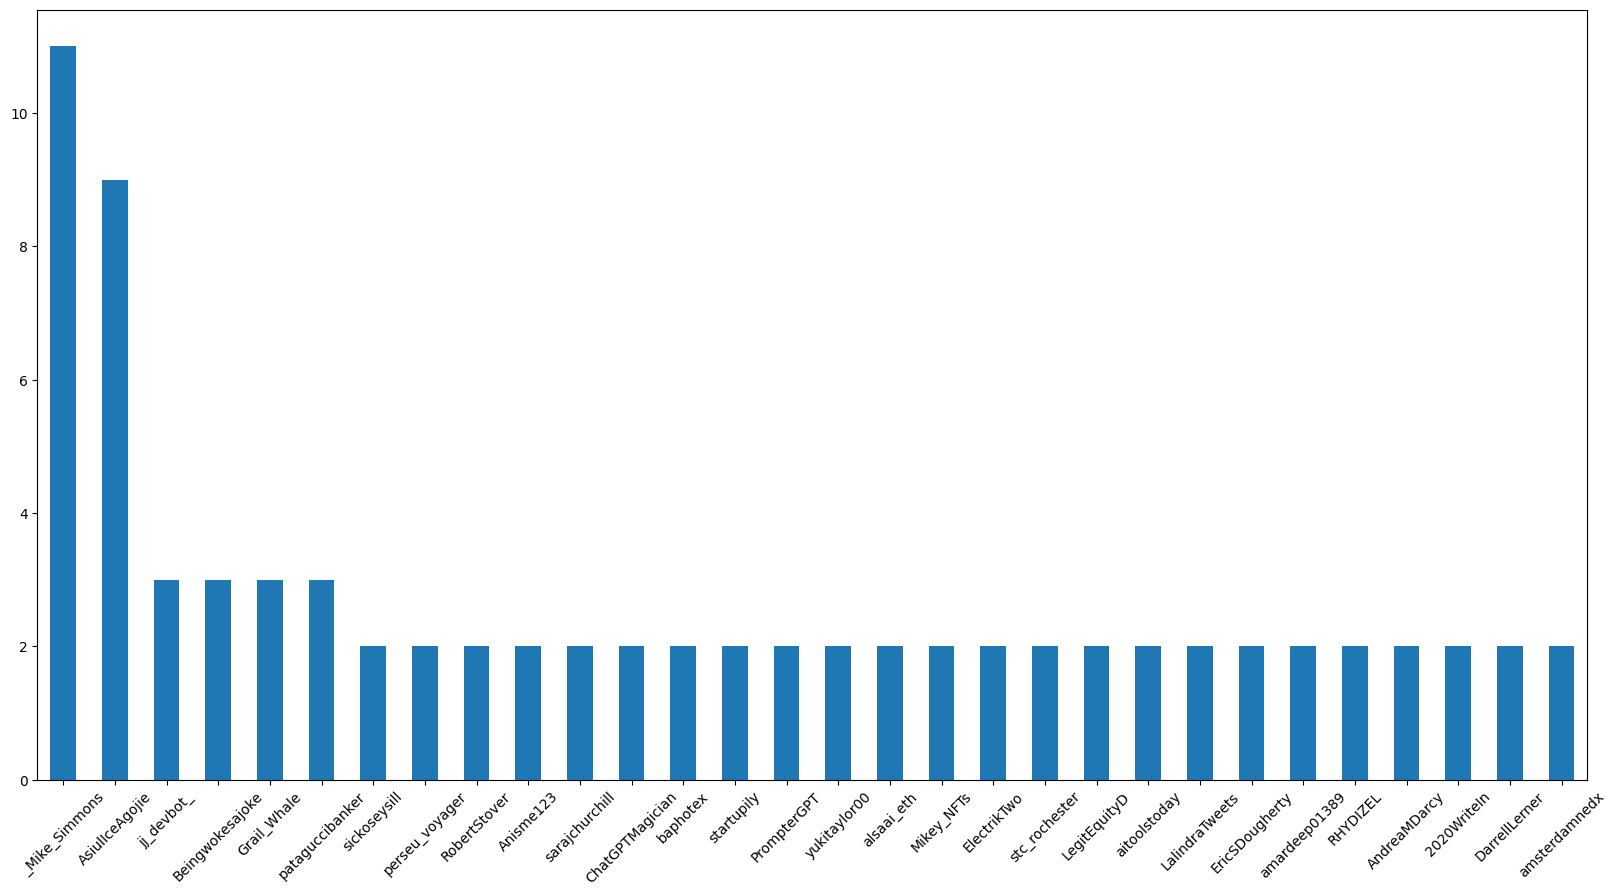

In [12]:
# Plot the top value_counts
plt.figure(figsize=(20, 10))
data['username'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# **Text analysis of tweets**

*Define functions to remove specific patterns from the text:*

In [13]:
# Load the tweet data into a DataFrame
data = pd.read_csv('/content/dataskripsi.csv')

# Define the preprocessing functions
def preprocess_text(text):
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_urls(text)
    text = remove_emojis(text)
    text = remove_special_characters(text)
    return text

def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

def remove_emojis(text):
    return demoji.replace(text, '')

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)




In [14]:
data['tweet']

0      as we move into 2023, the global economy isn‘t...
1                           This is a chat gpt response.
2      If we are living in a simulated world, we may ...
3      I was showing someone at work how Chat GPT wor...
4              Can chatGPT do taxes? Asking for a friend
                             ...                        
995    I'm quite jealous of young students and people...
996    When I’m being asked something I don’t know I ...
997    Can someone make a ChatGPT voice over of Robin...
998    ChatGPT is the best thing ever to hit the inte...
999    I'm sorry but #ChatGPT is not impressive to me...
Name: tweet, Length: 1000, dtype: object

In [15]:
data['tweet'].iloc[4]

'Can chatGPT do taxes? Asking for a friend'

In [16]:
# Cleaning Text
data['clean_tweet'] = data['tweet'].apply(remove_hashtags)

In [17]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_mentions)
data[['tweet','clean_tweet']]

,tweet,clean_tweet
0,"as we move into 2023, the global economy isn‘t...","as we move into 2023, the global economy isn‘t..."
1,This is a chat gpt response.,This is a chat gpt response.
2,"If we are living in a simulated world, we may ...","If we are living in a simulated world, we may ..."
3,I was showing someone at work how Chat GPT wor...,I was showing someone at work how Chat GPT wor...
4,Can chatGPT do taxes? Asking for a friend,Can chatGPT do taxes? Asking for a friend
...,...,...
995,I'm quite jealous of young students and people...,I'm quite jealous of young students and people...
996,When I’m being asked something I don’t know I ...,When I’m being asked something I don’t know I ...
997,Can someone make a ChatGPT voice over of Robin...,Can someone make a ChatGPT voice over of Robin...
998,ChatGPT is the best thing ever to hit the inte...,ChatGPT is the best thing ever to hit the inte...


In [18]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_urls)
data[['tweet','clean_tweet']]

,tweet,clean_tweet
0,"as we move into 2023, the global economy isn‘t...","as we move into 2023, the global economy isn‘t..."
1,This is a chat gpt response.,This is a chat gpt response.
2,"If we are living in a simulated world, we may ...","If we are living in a simulated world, we may ..."
3,I was showing someone at work how Chat GPT wor...,I was showing someone at work how Chat GPT wor...
4,Can chatGPT do taxes? Asking for a friend,Can chatGPT do taxes? Asking for a friend
...,...,...
995,I'm quite jealous of young students and people...,I'm quite jealous of young students and people...
996,When I’m being asked something I don’t know I ...,When I’m being asked something I don’t know I ...
997,Can someone make a ChatGPT voice over of Robin...,Can someone make a ChatGPT voice over of Robin...
998,ChatGPT is the best thing ever to hit the inte...,ChatGPT is the best thing ever to hit the inte...


In [19]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_emojis)
data[['tweet','clean_tweet']]

,tweet,clean_tweet
0,"as we move into 2023, the global economy isn‘t...","as we move into 2023, the global economy isn‘t..."
1,This is a chat gpt response.,This is a chat gpt response.
2,"If we are living in a simulated world, we may ...","If we are living in a simulated world, we may ..."
3,I was showing someone at work how Chat GPT wor...,I was showing someone at work how Chat GPT wor...
4,Can chatGPT do taxes? Asking for a friend,Can chatGPT do taxes? Asking for a friend
...,...,...
995,I'm quite jealous of young students and people...,I'm quite jealous of young students and people...
996,When I’m being asked something I don’t know I ...,When I’m being asked something I don’t know I ...
997,Can someone make a ChatGPT voice over of Robin...,Can someone make a ChatGPT voice over of Robin...
998,ChatGPT is the best thing ever to hit the inte...,ChatGPT is the best thing ever to hit the inte...


In [20]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_special_characters)
data[['tweet','clean_tweet']]

,tweet,clean_tweet
0,"as we move into 2023, the global economy isn‘t...",as we move into 2023 the global economy isnt q...
1,This is a chat gpt response.,This is a chat gpt response
2,"If we are living in a simulated world, we may ...",If we are living in a simulated world we may s...
3,I was showing someone at work how Chat GPT wor...,I was showing someone at work how Chat GPT wor...
4,Can chatGPT do taxes? Asking for a friend,Can chatGPT do taxes Asking for a friend
...,...,...
995,I'm quite jealous of young students and people...,Im quite jealous of young students and people ...
996,When I’m being asked something I don’t know I ...,When Im being asked something I dont know I ju...
997,Can someone make a ChatGPT voice over of Robin...,Can someone make a ChatGPT voice over of Robin...
998,ChatGPT is the best thing ever to hit the inte...,ChatGPT is the best thing ever to hit the inte...


In [21]:
data['clean_tweet'].iloc[10]

'why on Gods green earth do I have to make an account to play around with ChatGPT Instantly clicked off'

In [22]:
data['clean_tweet']

0      as we move into 2023 the global economy isnt q...
1                            This is a chat gpt response
2      If we are living in a simulated world we may s...
3      I was showing someone at work how Chat GPT wor...
4               Can chatGPT do taxes Asking for a friend
                             ...                        
995    Im quite jealous of young students and people ...
996    When Im being asked something I dont know I ju...
997    Can someone make a ChatGPT voice over of Robin...
998    ChatGPT is the best thing ever to hit the inte...
999    Im sorry but ChatGPT is not impressive to me I...
Name: clean_tweet, Length: 1000, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
data['tweet'] = label_encoder.fit_transform(data['tweet'])



In [25]:
from textblob import TextBlob

In [26]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [27]:
# Text
ex1 = data['clean_tweet'].iloc[0]
get_sentiment(ex1)
data['sentiment_results'] = data['clean_tweet'].apply(get_sentiment)

In [28]:
# Get sentiment for a specific tweet
ex1 = data['clean_tweet'].iloc[0]
ex1_sentiment = get_sentiment(str(ex1))
print("Sentiment for the first tweet:")
print(ex1_sentiment)
print()

# Apply sentiment analysis to the entire DataFrame
data['sentiment_results'] = data['clean_tweet'].apply(lambda x: get_sentiment(str(x)))

# Print the sentiment results for the DataFrame
print("Sentiment analysis results for the entire DataFrame:")
print(data['sentiment_results'])


Sentiment for the first tweet:
{'polarity': 0.24062499999999998, 'subjectivity': 0.4, 'sentiment': 'Positive'}

Sentiment analysis results for the entire DataFrame:
0      {'polarity': 0.24062499999999998, 'subjectivit...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.25, 'subjectivity': 0.325, 'sen...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                             ...                        
995    {'polarity': 0.2545454545454545, 'subjectivity...
996    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
997    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
998    {'polarity': 1.0, 'subjectivity': 0.3, 'sentim...
999    {'polarity': 0.04285714285714286, 'subjectivit...
Name: sentiment_results, Length: 1000, dtype: object


In [29]:
pd.json_normalize(data['sentiment_results'].iloc[5])

,polarity,subjectivity,sentiment
0,-0.4,0.7,Negative


In [30]:
pd.json_normalize(data['sentiment_results'])

,polarity,subjectivity,sentiment
0,0.240625,0.400000,Positive
1,0.000000,0.000000,Neutral
2,0.250000,0.325000,Positive
3,0.000000,0.000000,Neutral
4,0.000000,0.000000,Neutral
...,...,...,...
995,0.254545,0.541818,Positive
996,0.000000,0.000000,Neutral
997,0.000000,0.000000,Neutral
998,1.000000,0.300000,Positive


In [31]:
data['sentiment_results']

0      {'polarity': 0.24062499999999998, 'subjectivit...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.25, 'subjectivity': 0.325, 'sen...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                             ...                        
995    {'polarity': 0.2545454545454545, 'subjectivity...
996    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
997    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
998    {'polarity': 1.0, 'subjectivity': 0.3, 'sentim...
999    {'polarity': 0.04285714285714286, 'subjectivit...
Name: sentiment_results, Length: 1000, dtype: object

In [32]:
data['sentiment_results'].iloc[0]

{'polarity': 0.24062499999999998, 'subjectivity': 0.4, 'sentiment': 'Positive'}

In [33]:
pd.json_normalize(data['sentiment_results'])

,polarity,subjectivity,sentiment
0,0.240625,0.400000,Positive
1,0.000000,0.000000,Neutral
2,0.250000,0.325000,Positive
3,0.000000,0.000000,Neutral
4,0.000000,0.000000,Neutral
...,...,...,...
995,0.254545,0.541818,Positive
996,0.000000,0.000000,Neutral
997,0.000000,0.000000,Neutral
998,1.000000,0.300000,Positive


In [34]:
data= data.join(pd.json_normalize(data['sentiment_results']))

In [35]:
data.head()

,Unnamed: 0,date,tweet,username,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2023-02-28 23:59:23+00:00,868,BigMovesRZ,as we move into 2023 the global economy isnt q...,"{'polarity': 0.24062499999999998, 'subjectivit...",0.240625,0.400,Positive
1,1,2023-02-28 23:58:59+00:00,751,ibrahiym,This is a chat gpt response,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral
2,2,2023-02-28 23:58:51+00:00,496,wliu2011,If we are living in a simulated world we may s...,"{'polarity': 0.25, 'subjectivity': 0.325, 'sen...",0.250000,0.325,Positive
3,3,2023-02-28 23:58:47+00:00,460,FatherOfKane,I was showing someone at work how Chat GPT wor...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral
4,4,2023-02-28 23:58:12+00:00,139,MissToriMadison,Can chatGPT do taxes Asking for a friend,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral


In [36]:
data

,Unnamed: 0,date,tweet,username,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2023-02-28 23:59:23+00:00,868,BigMovesRZ,as we move into 2023 the global economy isnt q...,"{'polarity': 0.24062499999999998, 'subjectivit...",0.240625,0.400000,Positive
1,1,2023-02-28 23:58:59+00:00,751,ibrahiym,This is a chat gpt response,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,2,2023-02-28 23:58:51+00:00,496,wliu2011,If we are living in a simulated world we may s...,"{'polarity': 0.25, 'subjectivity': 0.325, 'sen...",0.250000,0.325000,Positive
3,3,2023-02-28 23:58:47+00:00,460,FatherOfKane,I was showing someone at work how Chat GPT wor...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,4,2023-02-28 23:58:12+00:00,139,MissToriMadison,Can chatGPT do taxes Asking for a friend,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
995,995,2023-02-28 16:24:19+00:00,471,danielbr93,Im quite jealous of young students and people ...,"{'polarity': 0.2545454545454545, 'subjectivity...",0.254545,0.541818,Positive
996,996,2023-02-28 16:24:06+00:00,818,pjlbrunelle,When Im being asked something I dont know I ju...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
997,997,2023-02-28 16:23:49+00:00,142,KhoiXBui,Can someone make a ChatGPT voice over of Robin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
998,998,2023-02-28 16:23:43+00:00,210,ScrewZayy,ChatGPT is the best thing ever to hit the inte...,"{'polarity': 1.0, 'subjectivity': 0.3, 'sentim...",1.000000,0.300000,Positive


In [37]:
pd.set_option('display.max_rows', None)   # Display all rows
pd.set_option('display.max_columns', None)   # Display all columns

In [38]:
from IPython.display import display
display(data)

,Unnamed: 0,date,tweet,username,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2023-02-28 23:59:23+00:00,868,BigMovesRZ,as we move into 2023 the global economy isnt q...,"{'polarity': 0.24062499999999998, 'subjectivit...",2.406250e-01,0.400000,Positive
1,1,2023-02-28 23:58:59+00:00,751,ibrahiym,This is a chat gpt response,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000e+00,0.000000,Neutral
2,2,2023-02-28 23:58:51+00:00,496,wliu2011,If we are living in a simulated world we may s...,"{'polarity': 0.25, 'subjectivity': 0.325, 'sen...",2.500000e-01,0.325000,Positive
3,3,2023-02-28 23:58:47+00:00,460,FatherOfKane,I was showing someone at work how Chat GPT wor...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000e+00,0.000000,Neutral
4,4,2023-02-28 23:58:12+00:00,139,MissToriMadison,Can chatGPT do taxes Asking for a friend,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000e+00,0.000000,Neutral
5,5,2023-02-28 23:54:31+00:00,399,SciFiClimateGuy,I asked ChatGPT Hypothetically how would an ar...,"{'polarity': -0.39999999999999997, 'subjectivi...",-4.000000e-01,0.700000,Negative
6,6,2023-02-28 23:53:14+00:00,782,Grail_Whale,Utilize ChatGPT as much as you can now while i...,"{'polarity': 0.20000000000000004, 'subjectivit...",2.000000e-01,0.666667,Positive
7,7,2023-02-28 23:52:16+00:00,601,jbtruth1,New York Times Shreds Ron DeSantis Memoir Like...,"{'polarity': -0.2601010101010101, 'subjectivit...",-2.601010e-01,0.651515,Negative
8,8,2023-02-28 23:52:02+00:00,349,michaelforce,Heres your michaelforceWackyChallenge for the ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000e+00,0.000000,Neutral
9,9,2023-02-28 23:51:37+00:00,117,optionwavtrader,Big market flush day on the horizon msft rev...,"{'polarity': 0.0, 'subjectivity': 0.1, 'sentim...",0.000000e+00,0.100000,Neutral


In [39]:
data['sentiment'].value_counts()

Positive    475
Neutral     323
Negative    202
Name: sentiment, dtype: int64

<Axes: >

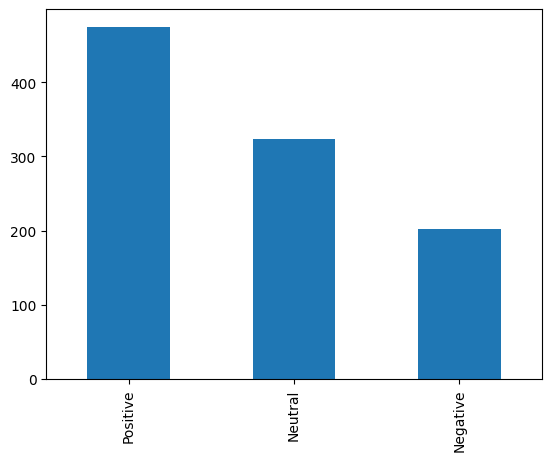

In [40]:
data['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='sentiment', ylabel='count'>

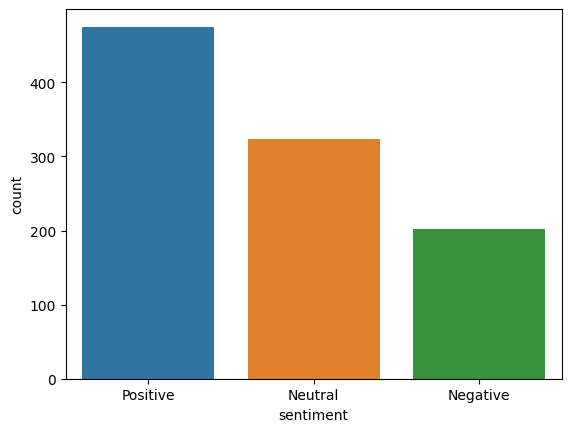

In [41]:
import seaborn as sns

sns.countplot(data=data, x='sentiment')

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
X = vectorizer.fit_transform(data['clean_tweet'])


In [44]:
# Get the feature names (i.e., the words)
feature_names = vectorizer.get_feature_names_out()


In [45]:
# Get the TF-IDF scores for the first document (you can change this to any document you're interested in)
doc = 0  # Change this to the index of the document you want to look at
feature_index = X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])

# Print out the keywords and their TF-IDF scores
for word, score in [(feature_names[i], score) for (i, score) in tfidf_scores]:
    print(word, score)

from collections import Counter

def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result


# Filter the DataFrame for positive tweets
positive_tweets = data[data['sentiment'] == 'Positive']['clean_tweet']

# Tokenize the positive tweets
pos_tokens = [word for tweet in positive_tweets for word in tweet.split()]

chatgpt 0.03118955451156629
bitcoin 0.1771536471186694
good 0.11747580739916262
at 0.10499465413815859
assets 0.1959799094726221
highquality 0.1771536471186694
accumulate 0.1959799094726221
to 0.045263921402254
opportunity 0.1771536471186694
an 0.09258884227175228
presenting 0.1959799094726221
range 0.1959799094726221
accumulation 0.1959799094726221
of 0.05952852458210126
period 0.1771536471186694
see 0.12528941224731457
may 0.14312790918930526
instead 0.14514072286786386
prices 0.36993450393364274
crypto 0.3045333639825181
in 0.13397416887095925
surge 0.1959799094726221
major 0.17109294434521174
for 0.06254947459935235
ready 0.15832738476471672
quite 0.16614098961286872
isnt 0.16614098961286872
economy 0.1771536471186694
global 0.1771536471186694
the 0.04712271271569497
2023 0.15226668199125906
into 0.1263144605139112
move 0.1771536471186694
we 0.2036971954057174
as 0.09382362559859372


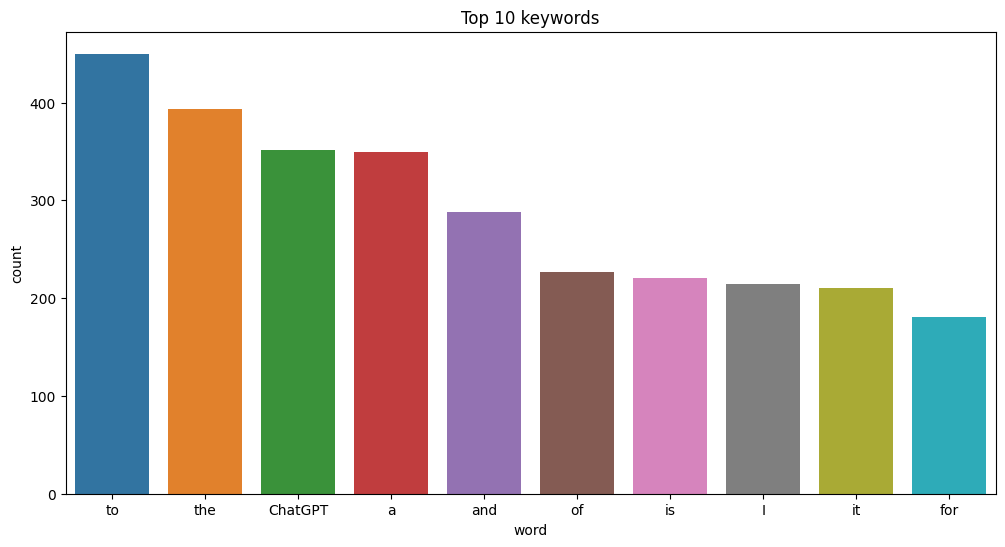

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

word_counts = get_tokens(pos_tokens)

# Convert the dictionary to a DataFrame
df_word_counts = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Plot the top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_word_counts.sort_values('count', ascending=False).head(10))
plt.title('Top 10 keywords')
plt.show()

# **Feature Extraction**

In [47]:
import numpy as np

In [48]:
from sklearn.model_selection import train_test_split

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preprocessed DataFrame
df = data

# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the clean_tweet data and transform the data
X = vectorizer.fit_transform(df['clean_tweet'])

# X is now a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary.
# The value in each cell is the TF-IDF score of the word in the document.
# Define y
y = df['sentiment']

# Split the data into training and testing sets
X_train = X[:999]  # Adjust the number of training samples as needed
X_test = X[999:]  # Adjust the number of testing samples as needed
y_train = y_encoded[:999]  # Adjust the label column as needed
y_test = y_encoded[999:]  # Adjust the label column as needed

# Initialize and fit the GMM model
n_components = 1  # Number of clusters
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_train.toarray(),y_train)

GaussianMixture()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
#Generate predictions using the GMM model
vect = CountVectorizer(ngram_range=(1,2)).fit(data['clean_tweet'])

y = data['sentiment']
X= data['clean_tweet']
X = vect.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
from sklearn.linear_model import LogisticRegression

gmm = LogisticRegression()

gmm.fit(X_train,y_train)

# Evaluate the model
y_pred = gmm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:", accuracy*100)

Accuracy: 58.75


In [69]:
from sklearn.metrics import classification_report

# Obtain the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.39      0.04      0.08       163
     Neutral       0.62      0.58      0.60       268
    Positive       0.58      0.83      0.68       369

    accuracy                           0.59       800
   macro avg       0.53      0.49      0.45       800
weighted avg       0.55      0.59      0.53       800

